In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"C:\Users\Kaviya Sree R.S\Downloads\inuupro\mushrooms.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
y=df['class']

In [7]:
x=df[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']]

In [8]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
y=l.fit_transform(y)
print(y)

[1 0 0 ... 0 1 0]


In [9]:
x.shape, y.shape

((8124, 22), (8124,))

In [10]:
for i in x.columns:
    if x[i].dtype == 'object':
        x[i] = l.fit_transform(x[i])

C:\Users\Kaviya Sree R.S\AppData\Local\Temp\ipykernel_23056\1672672217.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = l.fit_transform(x[i])
C:\Users\Kaviya Sree R.S\AppData\Local\Temp\ipykernel_23056\1672672217.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = l.fit_transform(x[i])
C:\Users\Kaviya Sree R.S\AppData\Local\Temp\ipykernel_23056\1672672217.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [11]:
print(x.isnull().sum())
x = x.fillna(x.mean())

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


C:\Users\Kaviya Sree R.S\AppData\Local\Temp\ipykernel_23056\131231279.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='viridis')


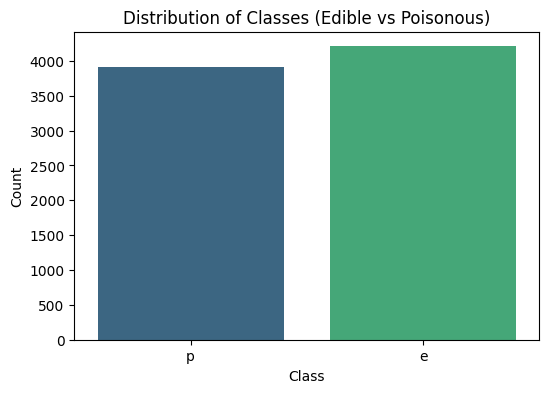

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Checking the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, palette='viridis')
plt.title('Distribution of Classes (Edible vs Poisonous)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [13]:
x.corr

<bound method DataFrame.corr of       cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0             5            2          4        1     6                1   
1             5            2          9        1     0                1   
2             0            2          8        1     3                1   
3             5            3          8        1     6                1   
4             5            2          3        0     5                1   
...         ...          ...        ...      ...   ...              ...   
8119          3            2          4        0     5                0   
8120          5            2          4        0     5                0   
8121          2            2          4        0     5                0   
8122          3            3          4        0     8                1   
8123          5            2          4        0     5                0   

      gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0   

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [16]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5686, 22), (2438, 22), (5686,), (2438,))

In [17]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

In [18]:
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)[:,-1]

In [19]:
c=classification_report(y_test,y_pred)
print("Classification Report")
print(c)

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1257
           1       1.00      0.98      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



In [20]:
print("Accuracy Score")

a=accuracy_score(y_test,y_pred)*100
print(a)

Accuracy Score
98.93355209187858


In [21]:
# Checking the R² score for the training data
train_score = model.score(x_train, y_train)
print(f"Training R² score: {train_score:.4f}")

# Checking the R² score for the test data
test_score = model.score(x_test, y_test)
print(f"Testing R² score: {test_score:.4f}")

Training R² score: 0.9909
Testing R² score: 0.9893


In [22]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'logistic_model.pkl'")

Model saved as 'logistic_model.pkl'


In [23]:
with open('label_encoder.pkl', 'wb') as encoder_file:
    pickle.dump(l, encoder_file)

print("Model and LabelEncoder saved successfully.")

Model and LabelEncoder saved successfully.
